##Aula 4

## Aula de Árvore de Decisão

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

profundidade = 4

R = 100 #holdout repetido
eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
    #ajuste de treino e teste
    arvore = DecisionTreeRegressor(max_depth= profundidade)
    arvore.fit(Xtreino, ytreino)
    #predicao
    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O erro quadratico Médio de Treino foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O erro quadratico médiio de teste foi: {:.2f}'.format(np.mean(eqms_teste)))




O erro quadratico Médio de Treino foi: 133.05
O erro quadratico médiio de teste foi: 149.89


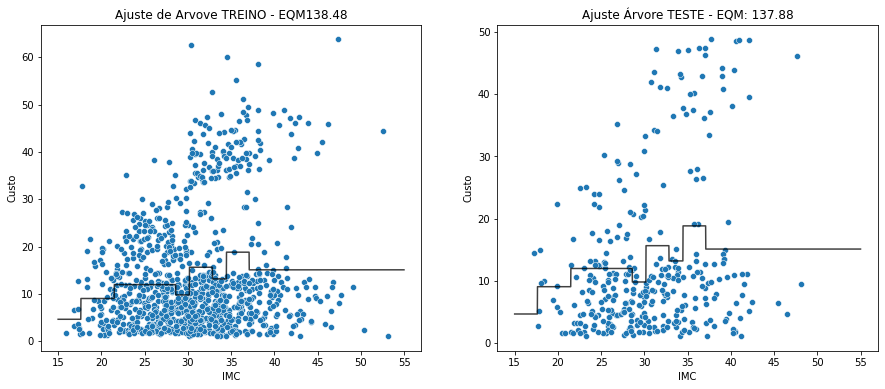

In [ ]:
#Gráfico da Arvore com 1 variavel

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1,2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste de Arvove TREINO - EQM' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')


plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()




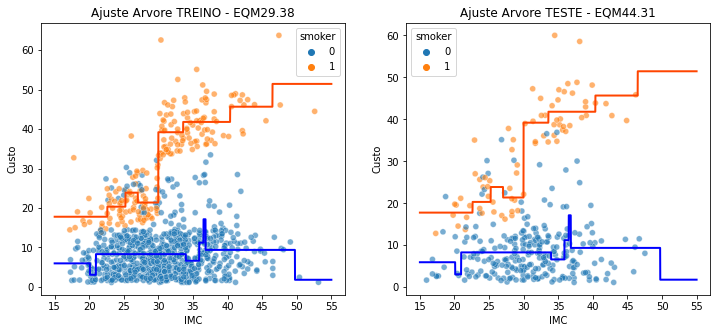

In [ ]:
#Grafico da Arvore com 2 variaveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth =2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Arvore TREINO - EQM' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Arvore TESTE - EQM' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()


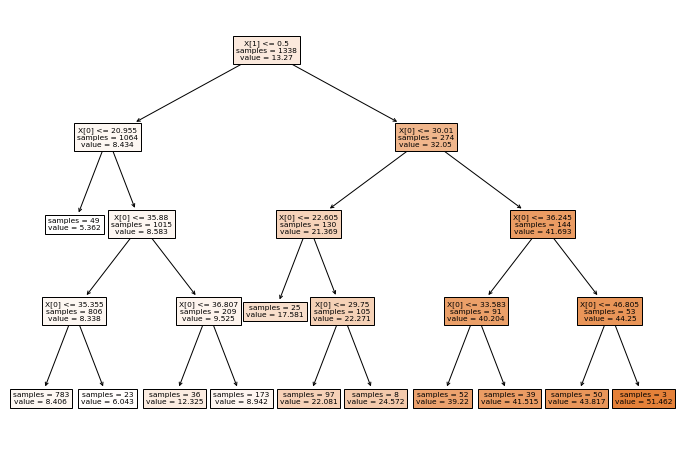

In [ ]:
from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth = profundidade, min_samples_split= 50)
arvore.fit(X, y)

plt.figure(figsize = (12, 8))
plot_tree(arvore, filled= True, proportion = False, impurity = False)
plt.show()